In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
input = torch.rand(1,3,224,224)
input.shape

torch.Size([1, 3, 224, 224])

In [7]:
layer1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
y1 = layer1(input)
y1.shape

torch.Size([1, 64, 112, 112])

In [9]:
layer2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
y2 = layer2(y1)
y2.shape

torch.Size([1, 64, 56, 56])

In [12]:
layer3 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1)
y3 = layer3(y2)
y3.shape

torch.Size([1, 192, 56, 56])

In [14]:
layer4 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
y4 = layer4(y3)
y4.shape

torch.Size([1, 192, 28, 28])

In [15]:
layer_1 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
    nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [20]:
def conv_1(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, 1,1),
        nn.ReLU()
    )
    return model

def conv_1_3(in_dim, mid_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, mid_dim, 1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim, out_dim, 3,1,1),
        nn.ReLU()
    )
    return model

def conv_1_5(in_dim, mid_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, mid_dim, 1,1),
        nn.ReLU(),
        nn.Conv2d(mid_dim, out_dim, 5,1,2),
        nn.ReLU()
    )
    return model

def max_1_5(in_dim, pool_dim):
    model = nn.Sequential(
        nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
        nn.Conv2d(in_dim, pool_dim,1,1),
        nn.ReLU()
    )
    return model

In [21]:
class inception(nn.Module):
    def __init__(self, in_dim, out_dim_1, mid_dim_3, out_dim_3, mid_dim_5, out_dim_5, pool_dim):
        super(inception, self).__init__()

        self.conv_1 = conv_1(in_dim, out_dim_1)

        self.conv_1_3 = conv_1_3(in_dim, mid_dim_3, out_dim_3)

        self.conv_1_5 = conv_1_5(in_dim, mid_dim_5, out_dim_5)

        self.max_1_5 = max_1_5(in_dim, pool_dim)

    def forward(self, x):
        out_1 = self.conv_1(x)
        out_2 = self.conv_1_3(x)
        out_3 = self.conv_1_5(x)
        out_4 = self.max_1_5(x)
        
        output = torch.cat([out_1, out_2, out_3, out_4], 1)
        
        return output

In [22]:
layer5 = inception(192,64,96,128,16,32,32)
y5 = layer5(y4)
y5.shape

torch.Size([1, 256, 28, 28])

In [23]:
layer6 = inception(256, 128, 128,192,32,96,64)
y6 = layer6(y5)
y6.shape

torch.Size([1, 480, 28, 28])

In [24]:
layer7 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
y7 = layer7(y6)
y7.shape

torch.Size([1, 480, 14, 14])

In [25]:
layer_2 = nn.Sequential(
    inception(192,64,96,128,16,32,32),
    inception(256, 128, 128,192,32,96,64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [26]:
layer8 = inception(480, 192, 96, 208, 16,48,64)
y8 = layer8(y7)
y8.shape

torch.Size([1, 512, 14, 14])

In [28]:
layer9 = inception(512, 160, 112, 224, 24,64,64)
y9 = layer9(y8)
y9.shape

torch.Size([1, 512, 14, 14])

In [30]:
layer10 = inception(512, 128,128,256,24,64,64)
y10 = layer10(y9)
y10.shape

torch.Size([1, 512, 14, 14])

In [32]:
layer11 = inception(512, 112, 144, 288,32, 64, 64)
y11 = layer11(y10)
y11.shape

torch.Size([1, 528, 14, 14])

In [33]:
layer12 = inception(528, 256, 160, 320, 32, 128, 128)
y12 = layer12(y11)
y12.shape

torch.Size([1, 832, 14, 14])

In [34]:
layer13 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
y13 = layer13(y12)
y13.shape

torch.Size([1, 832, 7, 7])

In [35]:
layer_3 = nn.Sequential(
    inception(480, 192, 96, 208, 16,48,64),
    inception(512, 160, 112, 224, 24,64,64),
    inception(512, 128,128,256,24,64,64),
    inception(512, 112, 144, 288,32, 64, 64),
    inception(528, 256, 160, 320, 32, 128, 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [36]:
layer14 = inception(832, 256,160,320, 32,128, 128)
y14 = layer14(y13)
y14.shape

torch.Size([1, 832, 7, 7])

In [37]:
layer15 = inception(832, 384, 192, 384, 48, 128, 128)
y15 = layer15(y14)
y15.shape

torch.Size([1, 1024, 7, 7])

In [40]:
layer16 = nn.AvgPool2d(kernel_size=7, stride=1, padding=0)
y16 = layer16(y15)
y16.shape

torch.Size([1, 1024, 1, 1])

In [41]:
layer_4 = nn.Sequential(
    inception(832, 256,160,320, 32,128, 128),
    inception(832, 384, 192, 384, 48, 128, 128),
    nn.AvgPool2d(kernel_size=7, stride=1, padding=0)
)

In [43]:
layer17 = nn.Dropout2d(p=0.4)

y17 = layer17(y16)

y18 = y17.view(y17.size(0), -1)

y18.shape

torch.Size([1, 1024])

In [44]:
layer18 = nn.Linear(1024, 10)
layer19 = nn.Softmax(dim=1)

y = layer19(layer18(y18))

y.shape

torch.Size([1, 10])

In [46]:
class GoogLeNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.layer_2 = nn.Sequential(
            inception(192,64,96,128,16,32,32),
            inception(256, 128, 128,192,32,96,64),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.layer_3 = nn.Sequential(
            inception(480, 192, 96, 208, 16,48,64),
            inception(512, 160, 112, 224, 24,64,64),
            inception(512, 128,128,256,24,64,64),
            inception(512, 112, 144, 288,32, 64, 64),
            inception(528, 256, 160, 320, 32, 128, 128),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.layer_4 = nn.Sequential(
            inception(832, 256,160,320, 32,128, 128),
            inception(832, 384, 192, 384, 48, 128, 128),
            nn.AvgPool2d(kernel_size=7, stride=1, padding=0)
        )

        self.dropout = nn.Dropout(0.4)

        self.fc = nn.Linear(1024, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.layer_4(x)
        x = x.view(x.size(0),-1)

        x = self.dropout(x)
        x = self.fc(x)
        x = self.softmax(x)

        return x
    
model = GoogLeNet()

output = model(input)

output.shape

torch.Size([1, 10])

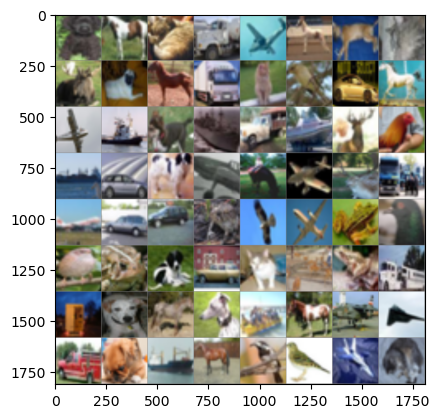

dog   horse cat   truck plane horse dog   cat   deer  dog   horse truck cat   bird  car   horse plane ship  dog   ship  truck ship  deer  bird  ship  car   dog   plane horse plane deer  truck plane car   car   frog  bird  plane frog  bird  bird  frog  dog   car   cat   deer  frog  truck truck dog   horse dog   ship  horse plane plane truck dog   ship  horse bird  bird  plane cat  


In [49]:
batch_size = 64

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train = datasets.CIFAR10(root="../data/", train=True, transform=transform)
trainloader = DataLoader(train, batch_size, shuffle=True)

test = datasets.CIFAR10(root="../data/", train=False, transform=transform)
testloader = DataLoader(test, batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [50]:
def test_model(model, testloader, device):
    model.eval()
    total_accuracy = 0.0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels  = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_accuracy += (predicted == labels).sum().item()

    model.train()

    return total_accuracy/total

In [51]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.05
epochs = 20

model = GoogLeNet().to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

loss_arr = []
accuracy_arr = []

for i in range(epochs):
    total_accuracy = 0.0

    for j,[image,label] in enumerate(tqdm(trainloader, desc=f'Epoch {i+1}/{epochs}')):

        x = image.to(device)
        y_ = label.to(device)

        output = model.forward(x)
        loss = loss_func(output, y_)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_accuracy = calculate_accuracy(output, y_)
        total_accuracy += batch_accuracy

    avg_accuracy = total_accuracy/len(trainloader)
    accuracy_arr.append(avg_accuracy)

    test_accuracy = test_model(model,trainloader,device)
    print(f'Epoch {i+1}/{epochs}, Loss: {loss}, Train Accuracy: {avg_accuracy * 100:.2f}%, Test_Accracy: {test_accuracy*100:.2f}%')
    loss_arr.append(loss.cpu().detach().numpy())

model_path = 'AlexNet.pth'

torch.save({
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss_arr,
    }, model_path)